In [ ]:
import numpy as np

In [ ]:
#每個酒類品項的酒精重量(g)
beer_w=[14, 36, 43.75 , 12]
beer_w=[i*0.8 for i in beer_w]
beer_w

[11.200000000000001, 28.8, 35.0, 9.600000000000001]

In [ ]:
# 分組 (0,4)(1,5)(2,6)(3,7)
def divide_group():
  s1=[0,1,2,3]
  s2=[4,5,6,7]
  team1=[]
  team2=[]
  for i in range(4):
    p=np.random.uniform(0,1)

    if p<0.5:
      team1.append(s1[i])
      team2.append(s2[i])
    else:
      team1.append(s2[i])
      team2.append(s1[i])

  return(team1, team2)

In [ ]:
def select_beer():
  beer=[0,1,2,3]
  p=np.random.uniform(0,1)
  if 0<p<=0.25:
    return beer[0]
  elif 0.25<p<=0.5:
    return beer[1]
  elif 0.5<p<=0.75:
    return beer[2]
  else:
    return beer[3]

In [ ]:
def select_people(team):
  p= np.random.uniform(0,1)
  if 0<p<=0.25:
    player=team[0]
  elif 0.25<p<=0.5:
    player=team[1]
  elif 0.5<p<=0.75:
    player=team[2]
  else:
    player=team[3]
  return player

In [ ]:
bw_g=0.49
bw_b=0.58
weight=[73,48,63,88,73,48,63,88]
sd=[1.4,3,4.375,1.2] #10G
sd_new=[i*0.789 for i in sd]
mr_g=0.017
mr_b=0.015
speed_hr= 4000#(每小時幾公尺)
speed_mi= 4000/60
def ebac_consumption(player, dist, sd_new):
  if player==1 or 5: #選到女生的代謝率
    z=(0.806*sd_new*1.2)/(bw_g*weight[player])-mr_g*dist/speed_hr
  else:              #選到男生的代謝率
    z=(0.806*sd_new*1.2)/(bw_b*weight[player])-mr_b*dist/speed_hr
  return z

In [ ]:
#每個人喝醉和喝吐的beta
weight=[73,48,63,88,73,48,63,88]
def decide_param():
  drunk_param_temp=[]
  throw_param_temp=[]
  for i in range(4):
    a1= np.random.uniform(0.06, 0.09)
    a2= np.random.uniform(0.1, 0.299)
    for j in range(2):
      drunk_param_temp.append(a1)
      throw_param_temp.append(a2)
  drunk_param_temp.sort()
  throw_param_temp.sort()
  drunk_param=[drunk_param_temp[4],drunk_param_temp[0],drunk_param_temp[2],drunk_param_temp[6],drunk_param_temp[5],drunk_param_temp[1],drunk_param_temp[3],drunk_param_temp[7]]
  throw_param=[throw_param_temp[4],throw_param_temp[0],throw_param_temp[2],throw_param_temp[6],throw_param_temp[5],throw_param_temp[1],throw_param_temp[3],throw_param_temp[7]]
  return (drunk_param, throw_param)

In [ ]:
# bw_g=0.49
# bw_b=0.58
# weight=[73,48,48,88,73.5,63,69,75]
# sd=[1.4,3,4.375,1.2] #10G
# sd_new=[i*0.789 for i in sd]
# mr_g=0.017
# mr_b=0.015
# speed= 4000#(每小時幾公尺) #人走路速度

def ebac_matrix(dist):
  ebac=[]
  for i in range(8):
    alcohol=[]
    for j in range(len(sd_new)):
      if i == 1 or 5:
        z=(0.806*sd_new[j]*1.2)/(bw_g*weight[i])-mr_g*dist/speed

      else:
        z=(0.806*sd_new[j]*1.2)/(bw_b*weight[i])-mr_b*dist/speed


      alcohol.append(z)
    ebac.append(alcohol)
  return(ebac)

In [ ]:
def drunk_TF(player_idx,ebac, throw_param,drunk_param):
    if throw_param[player_idx]>=ebac>=drunk_param[player_idx]:
      return 1
    else:
      return 0

In [ ]:
def throw_TF(player_idx,ebac, throw_param):
  #print('player_idx',player_idx,'param',throw_param[player_idx],'ebac',ebac)
  if throw_param[player_idx]<ebac:
    #print('outcome', 1)
    return 1
  else:
    #print('outcome', 0)
    return 0

In [ ]:
import math

In [ ]:
# simulation

#血液中的酒精濃度達0.08%以上為醉酒
#血液中的酒精濃度達0.1%~0.299%會出現嘔吐現象
#血液中的酒精濃度達0.299%以上會出現昏迷和死亡的風險
#用ebac算是否醉酒
#d=[]
#team1=[0,5,6,3]
#team2=[4,1,2,7]
def simulation(team1,team2, player_combination1, store_num,throw_param, drunk_param):
  time=0
  beer_l=[]
  team1_win_num=0

  player_drunk_TF1=[0,0,0,0]
  player_drunk_TF2=[0,0,0,0]
  player_throw_TF1=[0,0,0,0]
  player_throw_TF2=[0,0,0,0]
  player_combination2=[]
  for p in range(store_num):
    player_combination2.append(select_people(team2))
  i=0

  player_ebac=[0,0,0,0,0,0,0,0]
  player_ebac_list=[[0],[0],[0],[0],[0],[0],[0],[0]]
  #variable

  d=[]
  for di in range(store_num):
    z=math.ceil(np.random.exponential(5)) #每一間的時間
    d.append(z)

  #print('dist',d)

  while True and i<store_num :
    for u in range(8):
      player_ebac_list[u].append(0)
    if i>1:
      #print('time',time)
      for m in range(len(team1)):
        for mm in range(i-1,-1,-1):

          if player_combination1[-mm]==team1[m]:
            #print('mm',mm)
            if player_ebac[team1[m]]- ebac_consumption(team1[m], 1, sd_new[beer_l[-mm]])>=0:
              player_ebac[team1[m]]-= ebac_consumption(team1[m], 1, sd_new[beer_l[-mm]])
              player_ebac_list[team1[m]][-1]=player_ebac[team1[m]]
            else:
              player_ebac[team1[m]]=0
              #player_ebac_list[team1[m]].append(0)
            #break
      for m in range(len(team2)):
        for mm in range(i-1,-1,-1):
          if player_combination2[-mm]==team2[m]:
            if player_ebac[team2[m]]- ebac_consumption(team2[m], 1, sd_new[beer_l[-mm]])>=0:
              player_ebac[team2[m]]-= ebac_consumption(team2[m], 1, sd_new[beer_l[-mm]])
              player_ebac_list[team2[m]][-1]=player_ebac[team2[m]]
            else:
              player_ebac[team2[m]]=0
              #player_ebac_list[team2[m]].append(0)
            #break

    if time==round((sum(d[:i+1]))):
      ebac= ebac_matrix(d[i])

      beer= select_beer()
      beer_l.append(beer)
      #print(ebac)
      #假設在超商內喝完酒才能走
      #喝醉判斷


      # ac_per_store1=ebac_consumption(player_combination1[i], d[i], sd_new[beer])
      # ac_per_store2=ebac_consumption(player_combination2[i], d[i], sd_new[beer])
      #print(i)
      # player_ebac[player_combination1[i]]+= ebac[player_combination1[i]][beer]
      # player_ebac[player_combination2[i]]+= ebac[player_combination2[i]][beer]
      # print(beer_l)

      # print(ebac_consumption(player_combination1[i], 1, sd_new[beer_l[-2]]))
      # print(ebac_consumption(player_combination2[i], 1, sd_new[beer_l[-2]]))
      # print('k1',i)
      # print('l1',player_combination1)
      # print('l2', player_combination2)
      # print('k',i,player_combination1[i],player_combination2[i])
      # print('a1',player_ebac[player_combination1[i]],'a2',player_ebac[player_combination2[i]])
      player_ebac_list[player_combination1[i]][-1]+=ebac[player_combination1[i]][beer]
      player_ebac[player_combination1[i]]+=ebac[player_combination1[i]][beer]
      player_ebac_list[player_combination2[i]][-1]+= ebac[player_combination2[i]][beer]
      player_ebac[player_combination2[i]]+=ebac[player_combination2[i]][beer]
      # print('pp1',ebac[player_combination1[i]][beer],'pp2',ebac[player_combination2[i]][beer])
      # print('p1',player_ebac[player_combination1[i]],'p2',player_ebac[player_combination2[i]])
      #喝醉判斷(四個人都喝醉比賽才結束)
      store=i
      #print('store',store)
      for s in range(store):
        player_drunk_TF1[team1.index( player_combination1[s] )]= drunk_TF(player_combination1[s],player_ebac[player_combination1[s]], throw_param,drunk_param)
        player_drunk_TF2[team2.index( player_combination2[s] )]= drunk_TF(player_combination2[s],player_ebac[player_combination2[s]], throw_param,drunk_param)
        if sum(player_drunk_TF1)==4 and sum(player_drunk_TF2)!=4:
          #print('team2 win drunk')
          break
        elif sum(player_drunk_TF1)!=4 and sum(player_drunk_TF2)==4:
          team1_win_num=1
          #print('team1 win drunk')
          break
        elif sum(player_drunk_TF1)==4 and sum(player_drunk_TF2)==4 :
          #print('fair drunk')
          break
      #喝吐判斷(一人喝吐比賽結束)
      player_throw_TF1[team1.index( player_combination1[store] )]= throw_TF(player_combination1[store],player_ebac[player_combination1[store]], throw_param)
      player_throw_TF2[team2.index( player_combination2[store] )]= throw_TF(player_combination2[store],player_ebac[player_combination2[store]], throw_param)
      if sum(player_throw_TF1)==1 and sum(player_throw_TF2)!=1:
        #print('team2 win throw')
        break
      elif sum(player_throw_TF1)!=1 and sum(player_throw_TF2)==1:
        team1_win_num=1
        #print('team1 win throw')
        break
      elif sum(player_throw_TF1)==1 and sum(player_throw_TF2)==1:
        #print('fair throw')
        break

      i+=1
    time+=1
  print(i)
  return ( team1_win_num, player_ebac, time ,player_ebac_list)#, player_ebac_list)#, team1,player_combination1, team2, player_combination2)


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, '%')

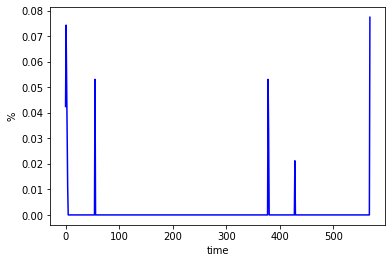

In [ ]:

bb=b[7]
plt.plot([i for i in range(len(bb))],bb,color='blue')
  # plt.plot([i for i in range(len(time10))],time10,color='green')
  # plt.plot([i for i in range(len(time15))],time15,color='red')
  # plt.legend(['mu=5','mu=10','mu=15'],loc='upper right')
  # plt.title(title)
plt.xlabel('time')
plt.ylabel('%')

In [ ]:
def random_search_odd(num):
  measurement=0
  store_num=30

  odd_l=[]
  best_odd=0

  player_combination1=[]
  throw_param, drunk_param= decide_param()
  team1, team2= divide_group()
  for s in range(store_num):
    player_combination1.append(select_people(team1))
  for i in range(num):
    a1, player_ebac, time,player_ebac_list= simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
    best_sequence=player_combination1
    best_odd+= a1
    measurement+=1
  best_odd= best_odd/ num
  best_sequence= player_combination1
  odd_l.extend([best_odd]*num)
  while measurement< 10000:
    odd=0
    player_combination1=[]
    #team1, team2= divide_group()
    for s in range(store_num):
      player_combination1.append(select_people(team1))
    for i in range(num):
      a1, player_ebac, time,player_ebac_list=simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
      odd+= a1
      measurement+=1
    odd= odd/num
    if odd>best_odd:
      best_odd= odd
      best_sequence= player_combination1
    odd_l.extend([best_odd]*num)
  return(odd_l, best_sequence)

In [ ]:
speed=4000

In [ ]:
odd_l, best_sequence= random_search_odd(10)

串流輸出內容已截斷至最後 5000 行。
4
1
1
0
1
2
3
0
2
1
4
0
6
2
4
1
2
2
0
0
2
3
7
3
0
1
2
7
1
4
0
1
0
0
11
1
4
0
1
0
2
2
2
0
1
1
0
0
2
1
0
1
0
1
0
0
1
1
0
1
1
0
1
1
4
10
2
1
0
0
2
0
0
1
0
0
1
0
3
1
2
1
4
0
0
0
3
0
1
2
0
1
0
2
0
1
0
2
0
2
0
0
5
4
0
1
4
0
0
1
1
1
1
0
0
1
0
1
0
0
3
1
4
1
0
3
1
0
2
5
1
2
3
0
4
0
0
0
1
7
0
0
0
1
0
0
1
0
0
1
0
4
1
1
2
2
1
2
0
1
0
1
1
1
3
0
0
0
0
2
0
0
1
1
0
0
1
0
1
1
0
2
6
0
1
2
1
2
7
0
3
0
5
0
1
0
3
0
1
0
3
1
0
5
0
1
0
1
1
1
1
2
0
1
3
0
1
2
3
2
0
1
1
1
1
2
0
0
1
4
0
2
1
1
1
0
3
1
0
2
5
1
2
0
0
1
0
2
0
3
1
3
2
2
1
1
5
0
3
3
3
6
6
1
4
1
2
2
7
6
1
1
2
1
1
1
2
0
1
2
3
3
0
3
0
3
1
0
1
1
0
1
0
1
0
1
0
1
1
1
0
5
0
2
3
1
2
0
0
0
1
0
3
0
0
3
1
0
2
0
1
1
3
3
2
3
1
2
0
3
1
6
5
2
1
6
3
0
1
3
2
0
2
0
0
2
2
7
0
0
1
0
0
1
0
1
6
3
6
0
0
3
1
3
1
1
0
0
1
0
4
1
5
0
3
0
2
2
1
1
0
1
1
0
1
1
0
0
0
0
2
1
2
1
2
2
1
1
1
1
3
0
4
2
5
0
3
2
0
2
0
1
1
5
3
0
1
0
0
0
0
3
0
2
2
0
1
3
2
2
0
0
0
4
1
0
0
0
3
1
0
2
0
1
0
0
2
0
1
0
1
1
2
1
2
0
1
2
4
0
1
4
1
5
0
2
0
1
2
0
1
1
0
0
1
1
0
0
1
0
3
5
2
0
0
1
0
3
0

In [ ]:
odd_l[-1]


0.9

In [ ]:
len(best_sequence)

30

In [ ]:
np.sum(np.array(player_ebac)[[1,2]])
np.array(player_ebac)[[1,2]]
team1

[4, 5, 6, 3]

In [ ]:
def random_search_ebac(num):
  measurement=0
  store_num=30

  ebac_l=[]
  best_ebac=0

  player_combination1=[]
  throw_param, drunk_param= decide_param()
  team1, team2= divide_group()
  for s in range(30):
    player_combination1.append(select_people(team1))
  for i in range(num):
    a1, player_ebac, time,player_ebac_list= simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
    avg_ebac= np.sum(np.array(player_ebac)[team1])
    best_ebac+= avg_ebac
    measurement+=1
  best_ebac= best_ebac/ num
  best_sequence=player_combination1
  ebac_l.extend([best_ebac]*num)
  while measurement< 10000:
    avg_ebac=0
    player_combination1=[]
    #team1, team2= divide_group()
    for s in range(30):
      player_combination1.append(select_people(team1))
    for i in range(num):
      a1, player_ebac, time,player_ebac_list=simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
      avg_ebac+= np.sum(np.array(player_ebac)[team1])
      measurement+=1
    sequence=player_combination1
    avg_ebac= avg_ebac/num
    if avg_ebac<best_ebac:
      best_ebac= avg_ebac
      best_sequence=sequence
    ebac_l.extend([best_ebac]*num)
  return ebac_l, best_sequence
  #return(odd_l, best_sequence)

In [ ]:
ebac_l,ebac_sequence=random_search_ebac(10)

串流輸出內容已截斷至最後 5000 行。
1
1
1
2
1
0
1
0
1
1
0
0
1
0
0
0
1
1
1
0
3
1
1
2
6
1
0
0
3
1
1
0
5
1
0
5
0
2
3
0
0
0
6
0
1
4
3
5
4
1
2
1
1
0
1
0
0
3
0
0
0
3
0
1
3
0
0
1
0
0
0
0
0
1
0
1
0
4
0
0
2
0
1
3
3
0
0
0
0
1
3
0
1
1
0
1
2
0
1
0
0
1
2
2
0
0
1
0
0
0
0
2
2
0
1
1
0
1
3
0
0
1
2
1
3
0
1
1
1
1
2
2
1
2
0
1
4
1
1
1
2
1
1
2
2
1
1
1
1
1
0
3
1
0
1
1
3
1
1
1
1
3
0
3
1
3
2
3
1
0
1
1
0
1
1
0
0
0
1
1
2
2
0
3
2
1
0
1
1
0
4
4
0
1
0
2
2
2
0
0
0
0
1
1
0
1
0
2
1
1
0
1
6
1
0
1
1
2
0
0
0
2
3
0
2
0
3
2
3
0
2
2
0
0
0
2
0
1
0
2
0
1
0
1
1
1
0
3
1
1
0
1
0
3
2
0
6
1
1
3
3
2
0
0
1
1
1
0
1
2
1
0
0
0
0
0
1
0
1
2
0
1
0
1
0
0
5
0
3
0
2
1
3
1
2
1
0
0
3
2
9
2
0
1
0
1
0
2
0
2
1
0
0
1
1
3
2
0
0
1
1
0
2
0
1
1
5
0
1
1
1
0
3
0
2
1
2
0
1
2
0
1
2
1
0
0
6
2
1
2
4
0
0
1
0
1
5
0
4
2
1
0
3
0
0
0
3
0
0
3
12
2
0
0
0
0
1
0
1
1
0
2
0
0
2
1
1
0
1
0
1
2
1
0
2
0
1
0
1
1
2
0
0
4
3
2
3
1
1
1
4
0
2
2
2
1
0
1
2
4
0
3
2
3
1
0
2
3
1
3
0
2
0
0
0
0
1
0
0
0
0
0
0
0
2
1
1
0
1
0
0
0
3
0
3
1
2
0
3
1
0
0
3
0
3
1
0
1
0
2
0
6
4
6
1
3
0
1
0
4
2
2
0
2
1
0
2
2
3


In [ ]:
print(ebac_sequence)

[3, 3, 5, 0, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 5, 0, 3, 2, 2, 3, 2, 0, 2, 0, 5, 0, 5, 3, 0, 2]


Text(0, 0.5, 'ebac')

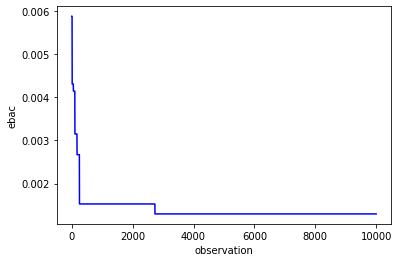

In [ ]:
plt.plot([i for i in range(len(ebac_l))],ebac_l,color='blue')
plt.xlabel('observation')
plt.ylabel('ebac')

Text(0, 0.5, 'time ratio')

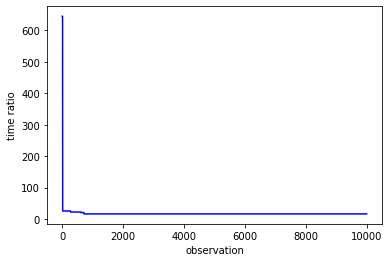

In [ ]:
plt.plot([i for i in range(len(time_l))],time_l,color='blue')
plt.xlabel('observation')
plt.ylabel('time ratio')

Text(0, 0.5, 'winning probability')

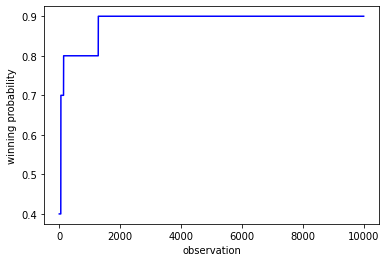

In [ ]:
plt.plot([i for i in range(len(odd_l))],odd_l,color='blue')
plt.xlabel('observation')
plt.ylabel('winning probability')

In [ ]:
print(best_sequence)

[3, 2, 4, 3, 4, 4, 3, 3, 2, 5, 3, 4, 5, 5, 4, 5, 2, 2, 5, 3, 4, 2, 5, 4, 3, 2, 4, 2, 2, 4]


In [ ]:
print(len(best_sequence))

20


In [ ]:
print(odd_l[-1])

0.71


In [ ]:
print(time_l[-1])

88.0


In [ ]:
def pic1(time5, time10, time15, title):
  plt.plot([i for i in range(len(time5))],time5,color='blue')
  plt.plot([i for i in range(len(time10))],time10,color='green')
  plt.plot([i for i in range(len(time15))],time15,color='red')
  plt.legend(['mu=5','mu=10','mu=15'],loc='upper right')
  plt.title(title)
  plt.xlabel('observation')
  plt.ylabel('time')

In [ ]:
def compute_drunk_time(player_ebac_list, team1,throw_param, drunk_param):
  team1_idx=[0,1,2,3]
  start=[0,0,0,0]
  end=[0,0,0,0]
  total_time=0
  for i in range(4):
    for j in range(len(player_ebac_list[team1[i]])):
      #j<len(player_ebac_list[team1[i]])-1 and
      if  player_ebac_list[team1[i]][j]>=drunk_param[team1[i]] and player_ebac_list[team1[i]][j+1]<drunk_param[team1[i]] :
        start[team1.index(team1[i])]= j
        #j>0 and
      if player_ebac_list[team1[i]][j]<drunk_param[team1[i]] and player_ebac_list[team1[i]][j-1]>drunk_param[team1[i]]:
        end[team1.index(team1[i])]= j
      if end[team1.index(team1[i])]>start[team1.index(team1[i])]:
        total_time= total_time+end[team1.index(team1[i])]-start[team1.index(team1[i])]
  print('total_time',total_time)
  return total_time

In [ ]:
def random_search_time(num):
  measurement=0
  store_num=30

  time_l=[]
  best_time=0
  avg_time=0
  player_combination1=[]
  throw_param, drunk_param= decide_param()
  team1, team2= divide_group()
  for s in range(store_num):
    player_combination1.append(select_people(team1))
  for i in range(num):
    a1, player_ebac, time,player_ebac_list= simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
    time_len= len(player_ebac_list[team1[0]])+len(player_ebac_list[team1[1]])+len(player_ebac_list[team1[2]])+len(player_ebac_list[team1[3]])
    avg_time+= compute_drunk_time(player_ebac_list, team1,throw_param, drunk_param)#/(time_len)
    measurement+=1
  avg_time=avg_time/num
  best_time= avg_time
  best_sequence= player_combination1
  time_l.extend([best_time]*num)
  while measurement< 10000:
    avg_time=0
    player_combination1=[]
    #team1, team2= divide_group()
    for s in range(store_num):
      player_combination1.append(select_people(team1))
    for i in range(num):
      a1, player_ebac, time,player_ebac_list=simulation(team1,team2, player_combination1,store_num,throw_param, drunk_param)
      time_len= len(player_ebac_list[team1[0]])+len(player_ebac_list[team1[1]])+len(player_ebac_list[team1[2]])+len(player_ebac_list[team1[3]])
      avg_time+= compute_drunk_time(player_ebac_list, team1,throw_param, drunk_param)#/(time_len)
      measurement+=1
    sequence= player_combination1
    avg_time= avg_time/num
    if avg_time<best_time:
      best_time= avg_time
      best_sequence= player_combination1
    time_l.extend([best_time]*num)
  return time_l, best_sequence, player_ebac_list
  #return(odd_l, best_sequence)

In [ ]:
speed=4000
time_l, time_sequence, player_ebac_l=random_search_time(10)

串流輸出內容已截斷至最後 5000 行。
total_time 0
3
total_time 0
1
total_time 0
3
total_time 0
2
total_time 0
2
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
3
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
1
total_time 0
2
total_time 0
1
total_time 0
0
total_time 0
1
total_time 0
0
total_time 0
4
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
2
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
1
total_time 0
0
total_time 0
4
total_time 0
1
total_time 0
1
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
4
total_time 0
4
total_time 0
1
total_time 0
4
total_time 0
2
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
0
total_time 0
3
total_time 0
2
total_time 0
3
total_time 0
1
total_time 0
0
total_time 0
0
total_time 0
1
total_time 0
1
total_time 0
0
total_time 0
1
total_time 0
1
total_time 0
1
tota

IndexError: ignored

In [ ]:
print(time_l)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
print(player_ebac_l)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.025545671442549628, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.14191555357142857], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.025545671442549628, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.14191555357142857], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [ ]:
print(time_sequence)

[5, 3, 4, 2, 5, 3, 2, 3, 3, 3, 2, 3, 4, 4, 3, 3, 2, 2, 4, 3, 3, 2, 3, 5, 2, 3, 2, 5, 3, 5]


In [ ]:
def pic_ebac(best_player_ebac5, title):

  fig, ax = plt.subplots(2,4, figsize=(20,10))

  ax[0][0].plot([i for i in range(len(best_player_ebac5[0]))],best_player_ebac5[0])
  ax[0][1].plot([i for i in range(len(best_player_ebac5[1]))],best_player_ebac5[1])
  ax[0][2].plot([i for i in range(len(best_player_ebac5[2]))],best_player_ebac5[2])
  ax[0][3].plot([i for i in range(len(best_player_ebac5[3]))],best_player_ebac5[3])
  ax[1][0].plot([i for i in range(len(best_player_ebac5[4]))],best_player_ebac5[4])
  ax[1][1].plot([i for i in range(len(best_player_ebac5[5]))],best_player_ebac5[5])
  ax[1][2].plot([i for i in range(len(best_player_ebac5[6]))],best_player_ebac5[6])
  ax[1][3].plot([i for i in range(len(best_player_ebac5[7]))],best_player_ebac5[7])
  ax[0, 0].set_title("player0")
  ax[0, 1].set_title("player1")
  ax[0, 2].set_title("player2")
  ax[0, 3].set_title("player3")
  ax[1, 0].set_title("player4")
  ax[1, 1].set_title("player5")
  ax[1, 2].set_title("player6")
  ax[1, 3].set_title("player7")

  plt.show()